## Flujo paralelo sobre placas planas

El problema hidrodinámico de la capa límite se reduce a resolver una ecuación diferencial ordinaria de tercer orden nolineal

$$2 \dfrac{d^3 f}{d \eta ^3} +  f \dfrac{d^2 f}{d \eta^2}=0 $$

Las condiciones de frontera en términos de variables de similitud son

$$\dfrac{df}{d \eta} |_{\eta=0} = f(0)= 0,$$
$$\qquad  \qquad \dfrac{df}{d\eta} |_{\eta=\infty}  = 1$$

La solución de la ecuación (1) con las condiciones de frontera mencionadas, se obtiene mediante una expansión en serie o por integración numérica. En lo que sigue se muestran las funciones de capa límite para una placa plana.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
eta = np.arange(0,7,0.4)
eta

array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. , 4.4, 4.8,
       5.2, 5.6, 6. , 6.4, 6.8])

In [3]:
#Tabla 7.1 Fundamentos de transferencia de calor
data = {'n':  eta,
        'f': [0.   , 0.027, 0.106, 0.238, 0.42 , 0.65 , 0.922, 1.231, 1.569,
       1.93 , 2.306, 2.692, 3.085, 3.482, 3.88 , 4.28 , 4.679, 5.079],'dfdn':[0.   , 0.133, 0.265, 0.394, 0.517, 0.63 , 0.729, 0.812, 0.876,
       0.923, 0.956, 0.976, 0.988, 0.994, 0.997, 0.999, 1.   , 1.   ],'dfdn2':[0.332, 0.331, 0.327, 0.317, 0.297, 0.267, 0.228, 0.184, 0.139,
       0.098, 0.064, 0.039, 0.022, 0.011, 0.005, 0.002, 0.001, 0.   ],
       }

t7 = pd.DataFrame(data)
t7

,n,f,dfdn,dfdn2
0,0.0,0.000,0.000,0.332
1,0.4,0.027,0.133,0.331
2,0.8,0.106,0.265,0.327
3,1.2,0.238,0.394,0.317
4,1.6,0.420,0.517,0.297
5,2.0,0.650,0.630,0.267
6,2.4,0.922,0.729,0.228
7,2.8,1.231,0.812,0.184
8,3.2,1.569,0.876,0.139
9,3.6,1.930,0.923,0.098


Graficamos $\quad f(\eta),\quad \dfrac{df}{d\eta} = \dfrac{u}{u_\infty}, \quad \dfrac{d^2f}{d \eta^2} $ 

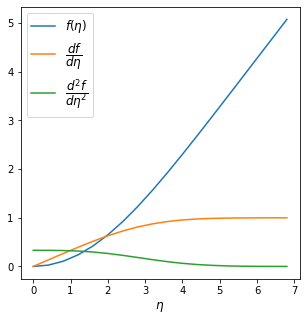

In [4]:
#grafica
plt.figure(figsize=(5,5))
fig = plt.subplot()
fig.plot(t7.n,t7.f, label = '$f(\eta)$')
fig.plot(t7.n,t7.dfdn, label = "$\dfrac{df}{d \eta}$")
fig.plot(t7.n,t7.dfdn2, label = "$\dfrac{d^2f}{d \eta^2}$")
fig.plot()
plt.legend(fontsize=12)
plt.xlabel('$\eta$',fontsize=12)
plt.show()

In [5]:
#Interpolar
dfdn  = t7.dfdn
eta   = t7.n.astype(float)

#Defino los valores de la tarea
ui    = 0.01
nu    = 0.00000179
x1    = 0.01
x2    = 0.1
x3    = 1
y1    = np.linspace(0,0.1,18)
y2    = np.linspace(0,0.1,18)
y3    = np.linspace(0,0.1,18)

#Defino eta para cada valor de x
n1    = y1*np.sqrt((ui)/(nu*x1))
n2    = y2*np.sqrt((ui)/(nu*x2))
n3    = y3*np.sqrt((ui)/(nu*x3))

#Creo un dataframe
eta1 = pd.DataFrame({'n':n1})
eta2 = pd.DataFrame({'n':n2})
eta3 = pd.DataFrame({'n':n3})

#Añado los valores de eta a la tabla 7.1
dfn1 = t7.append(eta1,ignore_index=True)
dfn2 = t7.append(eta2,ignore_index=True)
dfn3 = t7.append(eta3,ignore_index=True)

#Ordeno los valores de eta para poder hacer la interpolación
dfn1 = dfn1.sort_values(by='n')
dfn2 = dfn2.sort_values(by='n')
dfn3 = dfn3.sort_values(by='n')

#Interpolo
df_n1 = dfn1.interpolate()
df_n2 = dfn2.interpolate()
df_n3 = dfn3.interpolate()

#Arreglo los índices para encontrar mis valores de eta
df_n1s = df_n1.sort_index()
df_n2s = df_n2.sort_index()
df_n3s = df_n3.sort_index()

#Defino un arreglo en el intervalo en los que están con mis valores
df_eta1= df_n1s.iloc[18:36]
df_eta2= df_n2s.iloc[18:36]
df_eta3= df_n3s.iloc[18:36]

/tmp/ipykernel_1287014/1423164286.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfn1 = t7.append(eta1,ignore_index=True)
/tmp/ipykernel_1287014/1423164286.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfn2 = t7.append(eta2,ignore_index=True)
/tmp/ipykernel_1287014/1423164286.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfn3 = t7.append(eta3,ignore_index=True)


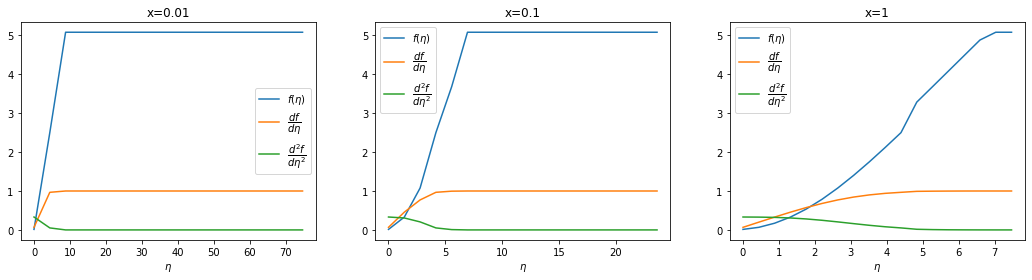

In [6]:
#Grafico para cada x

fig, axs = plt.subplots(1, 3,figsize=(18,4))

axs[0].plot(df_eta1.n,df_eta1.f, label='$f(\eta)$')
axs[0].plot(df_eta1.n,df_eta1.dfdn, label='$\dfrac{df}{d \eta}$')
axs[0].plot(df_eta1.n,df_eta1.dfdn2, label="$\dfrac{d^2f}{d \eta^2}$")
axs[0].set_xlabel("$\eta$")
axs[0].set_title("x=0.01")
axs[0].legend()

axs[1].plot(df_eta2.n,df_eta2.f, label='$f(\eta)$')
axs[1].plot(df_eta2.n,df_eta2.dfdn, label='$\dfrac{df}{d \eta}$')
axs[1].plot(df_eta2.n,df_eta2.dfdn2, label="$\dfrac{d^2f}{d \eta^2}$")
axs[1].set_xlabel("$\eta$")
axs[1].set_title("x=0.1")
axs[1].legend()

axs[2].plot(df_eta3.n,df_eta3.f, label='$f(\eta)$')
axs[2].plot(df_eta3.n,df_eta3.dfdn, label='$\dfrac{df}{d \eta}$')
axs[2].plot(df_eta3.n,df_eta3.dfdn2, label="$\dfrac{d^2f}{d \eta^2}$")
axs[2].set_xlabel("$\eta$")
axs[2].set_title("x=1")
axs[2].legend()

plt.show()


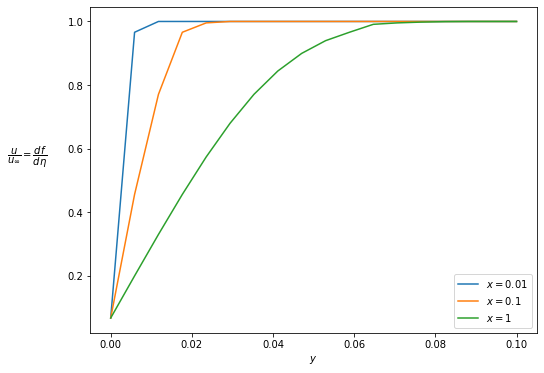

In [7]:
#Encuentro u(y)
ui = 0.01

u1 = ui*df_eta1.dfdn
u2 = ui*df_eta2.dfdn
u3 = ui*df_eta3.dfdn

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(y1,u1/ui,label="$x=0.01$")
ax.plot(y2,u2/ui,label="$x=0.1$")
ax.plot(y3,u3/ui,label="$x=1$")
ax.legend()
ax.set_xlabel('$y$')
ax.set_ylabel("$ \dfrac{u}{u_{\infty}} = \dfrac{df}{d\eta}$",rotation=0,labelpad=40)
plt.show()

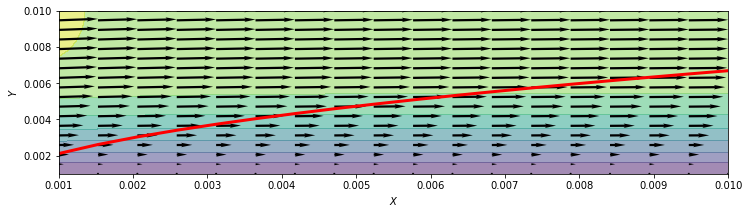

In [135]:
ui    = 0.01
nu    = 0.00000179

y = np.linspace(0.001,0.01,18)
x = np.linspace(0.001,0.01,18)


Y,X = np.meshgrid(x,y)

eta    = np.full((18,18),t7.n)
dfdeta = np.full((18,18),t7.dfdn)
f      = np.full((18,18),t7.f)
delta  = (5)/np.sqrt(ui/(nu*x))
u = ui*dfdeta
v = (1/2.)*np.sqrt((nu*ui)/X)*((eta*dfdeta)-f)
M = np.sqrt(u*u+v*v) # magnitude

plt.figure(figsize=(12,3))
plt.contourf(X, Y,M,cmap=plt.cm.viridis,alpha=0.5)
plt.quiver(X, Y, 10*u,v, scale=1.7,headwidth=2)
plt.plot(x,delta,'red',linewidth=3)
plt.xlabel("$X$")
plt.ylabel("$Y$")
#plt.xlim(0.001,0.01)
#plt.ylim(0.001,0.01)
plt.show()